In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from aquarel import load_theme

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# show all columns of a pandas dataframe
pd.set_option('display.max_columns', None)

### Import & clean the data

The dataset shows Airbnb activity in Seattle, has been provided by Airbnb and can be downloaded on Kaggle: <br> 
https://www.kaggle.com/datasets/airbnb/seattle/data <br>

The dataset contains the following:
- Calendar, including listing id and the price and availability for that day (calender.csv)
- Listings, including full descriptions and average review score (listings.csv)
- Reviews, including unique id for each reviewer and detailed comments (reviews.csv)

In [347]:
# Import the datasets
df_cal = pd.read_csv("data/calendar.csv")
df_list = pd.read_csv("data/listings.csv")
df_rev = pd.read_csv("data/reviews.csv")

---
Check & modify the dataframe with the calendar

In [348]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [349]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [350]:
# change column date from str to datetime
df_cal['date'] = pd.to_datetime(df_cal.date)

# get the month
df_cal['month'] = df_cal['date'].apply(lambda x: x.month)

# get the month_name
df_cal['month_name'] = df_cal['date'].apply(lambda x: x.month_name())

# calculate the week
df_cal['week'] = df_cal['date'].apply(lambda x: x.isocalendar()[1])

# change column available from string to boolean
df_cal['available'] = df_cal['available'].apply(lambda x: True if x == 't' else False)

# calculate a new column without currency sign
df_cal['price_usd_cal'] = df_cal['price'].apply(lambda x: x[1:] if isinstance(x, str) else x)

# remove thousand separator and convert column to float
df_cal['price_usd_cal'] = df_cal['price_usd_cal'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x).astype(float)

# drop column price
df_cal = df_cal.drop(columns='price')

In [351]:
df_cal.date[0].month_name()

'January'

In [352]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   listing_id     1393570 non-null  int64         
 1   date           1393570 non-null  datetime64[ns]
 2   available      1393570 non-null  bool          
 3   month          1393570 non-null  int64         
 4   month_name     1393570 non-null  object        
 5   week           1393570 non-null  int64         
 6   price_usd_cal  934542 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 65.1+ MB


In [353]:
df_cal.describe()

,listing_id,date,month,week,price_usd_cal
count,1.393570e+06,1393570,1.393570e+06,1.393570e+06,934542.000000
mean,5.550111e+06,2016-07-04 00:00:00.000000256,6.528767e+00,2.643014e+01,137.944859
min,3.335000e+03,2016-01-04 00:00:00,1.000000e+00,1.000000e+00,10.000000
25%,3.258213e+06,2016-04-04 00:00:00,4.000000e+00,1.300000e+01,75.000000
50%,6.118244e+06,2016-07-04 00:00:00,7.000000e+00,2.600000e+01,109.000000
75%,8.035212e+06,2016-10-03 00:00:00,1.000000e+01,3.900000e+01,160.000000
max,1.034016e+07,2017-01-02 00:00:00,1.200000e+01,5.200000e+01,1650.000000
std,2.962274e+06,NaN,3.443855e+00,1.504692e+01,105.062870


In [354]:
df_cal.shape

(1393570, 7)

---
Check & modify the dataframe with the listings

In [355]:
df_list.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [356]:
# rename the column id to listing_id for later join
df_list = df_list.rename(columns={'id' : 'listing_id'})

# change some columns from str to boolean
col_bool = ['host_is_superhost',
            'host_has_profile_pic',
            'host_identity_verified',
            'is_location_exact',
            'has_availability',
            'requires_license',
            'instant_bookable',
            'require_guest_profile_picture',
            'require_guest_phone_verification']

for col in col_bool:
    df_list[col] = df_list[col].apply(lambda x: True if x == 't' else False)


# change column from str to datetime
col_date = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

for col in col_date:
    df_list[col] = pd.to_datetime(df_list[col])


# replace percentage sign and convert column from str to float
col_perc = ['host_response_rate', 'host_acceptance_rate']

for col in col_perc:
    df_list[col] = df_list[col].apply(lambda x: x[:-1] if isinstance(x, str) else x).astype(float)


# calculate a new column without currency sign
col_curr = ['price','extra_people', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

for col in col_curr:
    df_list[col] = df_list[col].apply(lambda x: x.replace(',', '') if isinstance(x,str) else x)
    df_list[col + '_usd'] = df_list[col].apply(lambda x: x[1:] if isinstance(x, str) else x).astype(float)

# generate numeric values for the column host_response_time
resp_dict = {
    'within an hour': 1,
    'within a few hours' : .75,
    'within a day' : .5,
    'a few days or more' : .25
}

df_list['host_response_time_val'] = df_list['host_response_time'].apply(lambda x: resp_dict[x] if isinstance(x, str) else x).astype(float)


# Prepare and extend the column amenities
df_list['amenities'] = df_list['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').replace('/', '_').replace('(s)', ''))
df_list['amenities'] = df_list['amenities'].apply(lambda x: x.lower())
df_list['amenities'] = df_list['amenities'].apply(lambda x: x.replace(' ', '_'))

temp_df = df_list['amenities'].str.get_dummies(sep=',')

new_cols = []
for entry in temp_df.columns:
    new_cols.append('amenity_' + entry)

temp_df.columns = new_cols

df_list = pd.concat([df_list, temp_df], axis = 1) 

In [357]:
# drop columns that are not further considered or needed
col_drop = ['thumbnail_url',
            'medium_url',
            'xl_picture_url',
            'host_location',
            'host_verifications',
            'state',
            'market',
            'smart_location',
            'country_code',
            'country',
            'jurisdiction_names',
            'price',
            'extra_people',
            'weekly_price',
            'monthly_price',
            'security_deposit',
            'cleaning_fee',
            'host_response_time',
            'amenities']

df_list = df_list.drop(columns=col_drop)

# calculate the price per accomodate
df_list['price_p_accom'] = df_list['price_usd'] / df_list['accommodates']

In [358]:
df_list.head(3)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,picture_url,host_id,host_url,host_name,host_since,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_usd,extra_people_usd,weekly_price_usd,monthly_price_usd,security_deposit_usd,cleaning_fee_usd,host_response_time_val,amenity_24-hour_check-in,amenity_air_conditioning,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cable_tv,amenity_carbon_monoxide_detector,amenity_cat,amenity_dog,amenity_doorman,amenity_dryer,amenity_elevator_in_building,amenity_essentials,amenity_family_kid_friendly,amenity_fire_extinguisher,amenity_first_aid_kit,amenity_free_parking_on_premises,amenity_gym,amenity_hair_dryer,amenity_hangers,amenity_heating,amenity_hot_tub,amenity_indoor_fireplace,amenity_internet,amenity_iron,amenity_kitchen,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_other_pet,amenity_pets_allowed,amenity_pets_live_on_this_property,amenity_pool,amenity_safety_card,amenity_shampoo,amenity_smoke_detector,amenity_smoking_allowed,amenity_suitable_for_events,amenity_tv,amenity_washer,amenity_washer___dryer,amenity_wheelchair_accessible,amenity_wireless_internet,price_p_accom
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"I am an artist, interior designer, and run a s...",96.0,100.0,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,2,1,365,4 weeks ago,True,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,NaN,False,moderate,False,False,2,4.07,85.0,5.0,NaN,NaN,NaN,NaN,0.75,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,21.250000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,Living east coast/left coast/overseas. Time i...,98.0,100.0,True,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,True,True,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.639123,-122

In [359]:
df_list.shape

(3818, 122)

In [360]:
nr_entries = df_list.shape[0]
df_list.square_feet.isna().sum() / nr_entries

0.9745940282870613

---

In [361]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


---
Join the calendar and the listing data

In [362]:
df_merge = df_cal.join(df_list.set_index('listing_id'), on = 'listing_id', lsuffix='_cal', rsuffix='_list')
df_merge.head(2)

,listing_id,date,available,month,month_name,week,price_usd_cal,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,picture_url,host_id,host_url,host_name,host_since,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_usd,extra_people_usd,weekly_price_usd,monthly_price_usd,security_deposit_usd,cleaning_fee_usd,host_response_time_val,amenity_24-hour_check-in,amenity_air_conditioning,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cable_tv,amenity_carbon_monoxide_detector,amenity_cat,amenity_dog,amenity_doorman,amenity_dryer,amenity_elevator_in_building,amenity_essentials,amenity_family_kid_friendly,amenity_fire_extinguisher,amenity_first_aid_kit,amenity_free_parking_on_premises,amenity_gym,amenity_hair_dryer,amenity_hangers,amenity_heating,amenity_hot_tub,amenity_indoor_fireplace,amenity_internet,amenity_iron,amenity_kitchen,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_other_pet,amenity_pets_allowed,amenity_pets_live_on_this_property,amenity_pool,amenity_safety_card,amenity_shampoo,amenity_smoke_detector,amenity_smoking_allowed,amenity_suitable_for_events,amenity_tv,amenity_washer,amenity_washer___dryer,amenity_wheelchair_accessible,amenity_wireless_internet,price_p_accom
0,241032,2016-01-04,True,1,January,1,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"I am an artist, interior designer, and run a s...",96.0,100.0,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,2,1,365,4 weeks ago,True,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,NaN,False,moderate,False,False,2,4.07,85.0,5.0,NaN,NaN,NaN,NaN,0.75,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,21.25
1,241032,2016-01-05,True,1,January,1,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"I am an artist, interior designer, and run a s...",96.0,100.0,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,2,1,365,4 weeks ago

### Analyze the data

In the following the data shall be analyzed and following questions answered:
- How does the mean price per accomodate vary over the year per region?
- In which region does the price per accomodate vary the most?
- What influences the cost per accomodate the most?

Weiteres Vorgehen:
- df_list: Welche Unterkünfte sind vorhanden, wie ist der nominelle Preis verteilt? --> nominelle Preis wenig aussagefähig, da verschiedene Typen miteinander verglichen werden --> Berechnung auf Werte pro Person.
- df_merge: Verteilung der Preise pro Unterkunft über der gesamten Stadt?
- df_merge: Schwankung der Preise über der Zeit über die gesamte Stadt 
- df_merge: MAP: Karte mit den Vierteln mit den Median Preisen sowie mit einem Wert für die Schwankung 

In [363]:
df_list.head(2)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,picture_url,host_id,host_url,host_name,host_since,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_usd,extra_people_usd,weekly_price_usd,monthly_price_usd,security_deposit_usd,cleaning_fee_usd,host_response_time_val,amenity_24-hour_check-in,amenity_air_conditioning,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cable_tv,amenity_carbon_monoxide_detector,amenity_cat,amenity_dog,amenity_doorman,amenity_dryer,amenity_elevator_in_building,amenity_essentials,amenity_family_kid_friendly,amenity_fire_extinguisher,amenity_first_aid_kit,amenity_free_parking_on_premises,amenity_gym,amenity_hair_dryer,amenity_hangers,amenity_heating,amenity_hot_tub,amenity_indoor_fireplace,amenity_internet,amenity_iron,amenity_kitchen,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_other_pet,amenity_pets_allowed,amenity_pets_live_on_this_property,amenity_pool,amenity_safety_card,amenity_shampoo,amenity_smoke_detector,amenity_smoking_allowed,amenity_suitable_for_events,amenity_tv,amenity_washer,amenity_washer___dryer,amenity_wheelchair_accessible,amenity_wireless_internet,price_p_accom
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"I am an artist, interior designer, and run a s...",96.0,100.0,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,2,1,365,4 weeks ago,True,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,NaN,False,moderate,False,False,2,4.07,85.0,5.0,NaN,NaN,NaN,NaN,0.75,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,21.25
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,Living east coast/left coast/overseas. Time i...,98.0,100.0,True,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,True,True,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.639123,-122.365

In [364]:
df_list_prop = df_list.property_type.value_counts().reset_index()
df_list_prop['rel']  = df_list_prop['count'] / len(df_list) * 100
df_list_prop['rel_cumsum'] = df_list_prop['rel'].cumsum()


fig = px.bar(
    df_list_prop, x='property_type', y='count',
    labels= {
                 'property_type': 'Property type',
                 'count': 'Number of objects'
            }
            )


fig.update_layout(
    yaxis_title='Number of Objects [-]',
    xaxis_title = 'Type',
    title='Number of listed property types',
    template='plotly_dark',
    width = 700,
    height = 600
)

fig.show()

In [365]:
df_list_prop = df_list.property_type.value_counts().reset_index()
df_list_prop['rel']  = df_list_prop['count'] / len(df_list) * 100
df_list_prop['rel_cumsum'] = df_list_prop['rel'].cumsum()


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=df_list_prop['property_type'], y=df_list_prop['rel'], 
                     name = 'Relative Number [%]'
             ))

fig.add_trace(go.Scatter(x=df_list_prop['property_type'], y=df_list_prop['rel_cumsum'],
                        name = 'Cumulative Sum [%]',
                        mode = 'lines'),
                        secondary_y=True)


fig.update_layout(
    title='Distribution of the object types',
    title_font = {"size": 20},
    xaxis_title = 'Object type',
    template='plotly_dark',
    hovermode = 'x',
    width = 1000,
    height = 600,
    yaxis = dict(
        title=dict(text="Relative Number [%]"),
        side="left",
        range=[0, 50]),
    yaxis2 = dict(
        title=dict(text="Cumulative Sum [%]"),
        side="right",
        range=[0, 100],
        overlaying="y",
        tickmode="sync")
)

fig.update_yaxes(
    title_font = {"size": 16},
    tickfont = {"size": 12}
    )

fig.update_xaxes(
    title_font = {"size": 16},
    tickfont = {"size": 12}
    )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="left",
    x=0
    ))



fig.show()

#### Price per Accomodate over the year per region

In [366]:
rel_cols = ['listing_id',
            'date',
            'week',
            'month',
            'month_name',
            'available',
            'price_usd',
            'price_usd_cal',
            'neighbourhood_group_cleansed',
            'accommodates']

df_merge_f = df_merge[rel_cols]

df_merge_f = df_merge_f[df_merge_f['available'] == True]

df_merge_f['price_fluc'] = df_merge_f['price_usd_cal'] / df_merge_f['price_usd']
df_merge_f['price_p_accom'] = df_merge_f['price_usd_cal'] / df_merge_f['accommodates']

df_merge_f.head(2)

,listing_id,date,week,month,month_name,available,price_usd,price_usd_cal,neighbourhood_group_cleansed,accommodates,price_fluc,price_p_accom
0,241032,2016-01-04,1,1,January,True,85.0,85.0,Queen Anne,4,1.0,21.25
1,241032,2016-01-05,1,1,January,True,85.0,85.0,Queen Anne,4,1.0,21.25


In [367]:
counts, bins = np.histogram(df_merge_f.price_p_accom, bins=range(0, 200, 5))
bin_label = str(bins[:-1]) + ' ... ' + str(bins[1:])

rels = np.round(counts / len(df_merge_f) * 100, 2)
rels_cumsum = rels.cumsum()

max_val = np.round(df_merge_f.price_p_accom.max(), 2)

bin_label = []

for i in range(len(bins)):
    if i < len(bins)-1:
        bin_label.append(str(bins[i]) + ' ... ' + str(bins[i+1]))


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=bin_label, y=rels, 
                     name = 'Relative Number [%]'
             ))

fig.add_trace(go.Scatter(x=bin_label, y=rels_cumsum, 
                        name = 'Cumulative Sum [%]',
                        mode = 'lines'),
                        secondary_y=True)

fig.update_layout(
    title='Distribution of the prices per accomodate',
    title_font = {"size": 20},
    xaxis_title = 'Price per accomodate class [USD]',
    template='plotly_dark',
    hovermode = 'x',
    width = 1000,
    height = 600,
    yaxis = dict(
        title=dict(text="Relative Number [%]"),
        side="left",
        range=[0, 15]),
    yaxis2 = dict(
        title=dict(text="Cumulative Sum [%]"),
        side="right",
        range=[0, 150],
        overlaying="y",
        tickmode="sync")
)

fig.update_yaxes(
    title_font = {"size": 16},
    tickfont = {"size": 12}
    )

fig.update_xaxes(
    title_font = {"size": 16},
    tickfont = {"size": 12}
    )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="left",
    x=0
    ))


fig.add_annotation(
    xref="x domain",
    yref="y domain",
    # The arrow head will be 25% along the x axis, starting from the left
    x=.98,
    # The arrow head will be 40% along the y axis, starting from the bottom
    y=.9,
    text=f"Maximum Value: {max_val} USD/accomodate",
    align="right",
    showarrow=False
)


fig.show()

#### Price per Accomodate over the year per region

In [368]:
# Function to calculate qunatiles in a variable way within an aggregtation
# Inspiration and adaption from the code here: https://stackoverflow.com/questions/17578115/pass-percentiles-to-pandas-agg-function

def quant(q):
    def calc_q(x):
        return x.quantile(q)
    return calc_q


In [370]:
df_agg = df_merge_f.groupby(['week']).agg(
    mean = ('price_fluc', 'mean'),
    median = ('price_fluc', 'median'),
    q01 = ('price_fluc', quant(0.01)),
    q05 = ('price_fluc', quant(0.05)),
    q25 = ('price_fluc', quant(0.25)),
    q50 = ('price_fluc', quant(0.5)),
    q75 = ('price_fluc', quant(0.75)),
    q95 = ('price_fluc', quant(0.95)),
    q99 = ('price_fluc', quant(0.99)),
    q99_5 = ('price_fluc', quant(0.995)),
    q99_9 = ('price_fluc', quant(0.999)),
    min_val = ('price_fluc', 'min'),
    max_val = ('price_fluc', 'max'),
).reset_index()

df_agg.head(2)

,week,mean,median,q01,q05,q25,q50,q75,q95,q99,q99_5,q99_9,min_val,max_val
0,1,0.990415,1.0,0.542636,0.714286,1.0,1.0,1.0,1.192516,1.562500,2.00000,3.258025,0.292793,4.747475
1,2,0.981272,1.0,0.541538,0.696203,1.0,1.0,1.0,1.215385,1.548571,1.71105,2.100000,0.292793,2.877907


In [371]:
# fig = px.box(df_merge_f, x ='week', y="price_fluc")

fig = px.line(df_agg, x="week", y=['q01','q05', "q50", 'q95', 'q99', 'q99_5'],
              labels={
                  'variable': 'Quantile',
                  'week': 'Week',
                  'value': 'Value'
              },
               title='Life expectancy in Canada',
               template='plotly_dark',
               )


fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

# fig.add_trace(go.Scatter(x=df_agg['week'], y=df_agg['q01'], mode="lines", name="q01"))

fig.show()

In [372]:
line_dict = {
    'q01' : '1% Quantile',
    'q05' : '5% Quantile',
    'q25' : '25% Quantile',
    'q50' : 'Median',
    'q75' : '75% Quantile',
    'q95' : '95% Quantile',
    'q99' : '99% Quantile',
    'q99_5' : '99.5% Quantile',
    'q99_9' : '99.9% Quantile',
}

In [373]:
fig = go.Figure([
    go.Scatter(
        name='Minimum',
        x=df_agg['week'],
        y=df_agg['min_val'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=False
    ),
    go.Scatter(
        name='Maximum',
        x=df_agg['week'],
        y=df_agg['max_val'],
        marker=dict(color="#444"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, .1)',
        fill='tonexty',
        showlegend=False
    )
])

lines = ['q01', 'q05', 'q25', 'q50', 'q75', 'q95', 'q99', 'q99_5', 'q99_9']

for l in lines:
    fig.add_trace(
        go.Scatter(
            name=line_dict[l],
            x=df_agg['week'],
            y=df_agg[l],
            line=dict(width=1.5),
            mode='lines',
            showlegend=True
        ),
    )


fig.update_layout(
    yaxis_title='Relative Price Fluctuation [-]',
    xaxis_title = 'Week',
    title='Relative Price Fluctuation',
    hovermode="x",
    template='plotly_dark',
    width = 1400,
    height = 600
)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="left",
    x=0
))

fig.update_xaxes(tick0 = 0, dtick = 4)

fig.show()

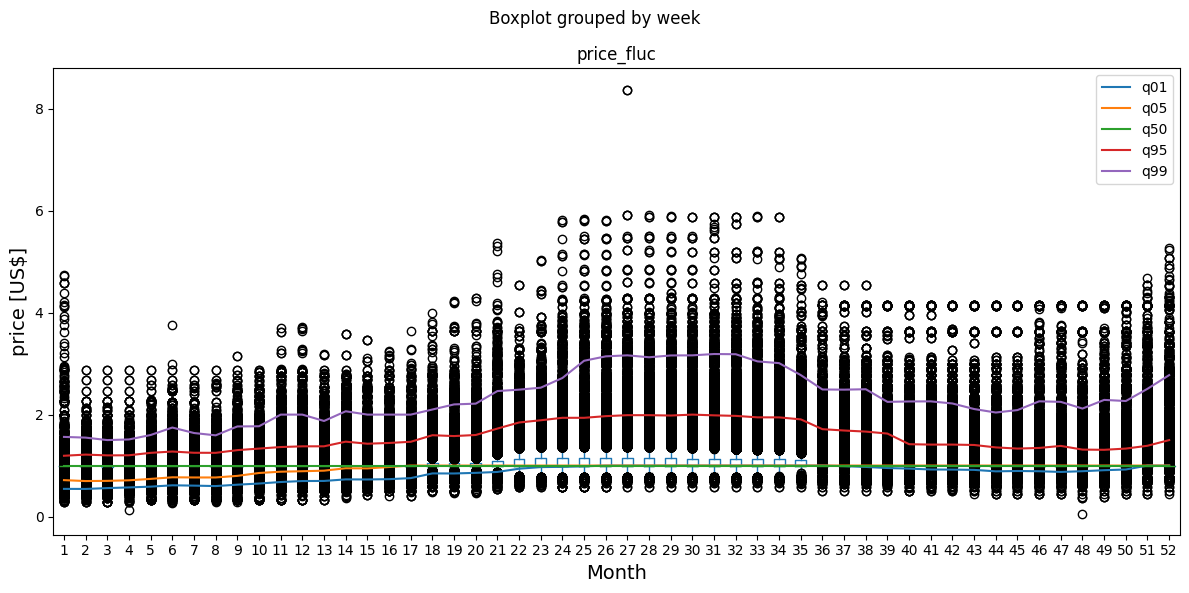

In [374]:
timerange = 'week'

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (12,6))

df_merge_f.boxplot(column='price_fluc', by=timerange, ax= ax)

df_agg.plot(x = timerange, y='q01', ax = ax, label = 'q01')
df_agg.plot(x = timerange, y='q05', ax = ax, label = 'q05')
df_agg.plot(x = timerange, y='q50', ax = ax, label = 'q50')
df_agg.plot(x = timerange, y='q95', ax = ax, label = 'q95')
df_agg.plot(x = timerange, y='q99', ax = ax, label = 'q99')


ax.set_xlabel('Month', fontsize = 14)
# ax.set_xticklabels(temp_df['month_name'])
ax.set_ylabel('price [US$]', fontsize = 14)

fig.tight_layout()

plt.show()

In [375]:
df_merge_f.neighbourhood_group_cleansed.unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [ ]:
df_agg = df_merge_f.groupby(['neighbourhood_group_cleansed','week']).agg(
    median = ('price_p_accom', 'median'),
    q05 = ('price_p_accom', q05),
    q95 = ('price_p_accom', q95)
).reset_index()

df_agg

,neighbourhood_group_cleansed,week,median,q05,q95
0,Ballard,1,33.312500,16.666667,66.666667
1,Ballard,2,32.666667,16.000000,63.000000
2,Ballard,3,32.500000,16.000000,63.000000
3,Ballard,4,32.500000,16.666667,62.975000
4,Ballard,5,33.000000,17.500000,66.666667
...,...,...,...,...,...
879,West Seattle,48,39.000000,17.000000,75.000000
880,West Seattle,49,39.000000,17.000000,75.000000
881,West Seattle,50,39.000000,17.000000,75.000000
882,West Seattle,51,39.500000,17.000000,75.000000


In [ ]:
temp_df = df_merge_f.groupby(['month', 'month_name']).count().reset_index()
temp_df['month_name'].to_list()

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

Weiteres Vorgehen:
- Berechnung des Medians pro Nachbarschaft und Berechnung der relative Änderung über das Jahr (Spread zwischen 5 und 95 % Percentil bspw.)
- Karte mit Darstellung der größten Änderung
- Ggf. Modellierung des Preises für Seattle oder aber auch nur einen Bereich